In [1]:
pip install -upgrade pip

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\admin\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\admin\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\admin\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\admin\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\admin\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\admin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-3-7 torch 1.8.1+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [7]:
img = 'https://images.news18.com/ibnlive/uploads/2017/07/2017-07-05T125828Z_1_LYNXMPED6412H_RTROPTP_3_INDIA-BLACKOUT.jpg?impolicy=website&width=510&height=356'

In [8]:
results = model(img)
results.print()

image 1/1: 340x510 23 cars, 2 buss
Speed: 4112.4ms pre-process, 593.4ms inference, 31.2ms NMS per image at shape (1, 3, 448, 640)


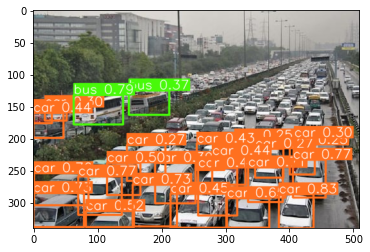

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [16]:
results.render

<bound method Detections.render of <models.common.Detections object at 0x0000029D339C4700>>

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
import uuid   # Unique identifier
import os
import time

In [13]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [15]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [13]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.3a176629-9d8c-11ec-acdc-3c52820c401a.jpg


In [14]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.438efd31-9d8c-11ec-8d89-3c52820c401a.jpg
data\images\awake.438efd32-9d8c-11ec-8025-3c52820c401a.jpg
data\images\awake.438efd33-9d8c-11ec-b7ee-3c52820c401a.jpg
data\images\awake.439034db-9d8c-11ec-b156-3c52820c401a.jpg
data\images\awake.439034dc-9d8c-11ec-b430-3c52820c401a.jpg
data\images\awake.439034dd-9d8c-11ec-ab91-3c52820c401a.jpg
data\images\awake.43905bb0-9d8c-11ec-9728-3c52820c401a.jpg
data\images\awake.43905bb1-9d8c-11ec-91c3-3c52820c401a.jpg
data\images\awake.43905bb2-9d8c-11ec-8696-3c52820c401a.jpg
data\images\awake.43905bb3-9d8c-11ec-8e1d-3c52820c401a.jpg
data\images\awake.43905bb4-9d8c-11ec-be98-3c52820c401a.jpg
data\images\awake.43905bb5-9d8c-11ec-add0-3c52820c401a.jpg
data\images\awake.439082aa-9d8c-11ec-9e3c-3c52820c401a.jpg
data\images\awake.439082ab-9d8c-11ec-a5bd-3c52820c401a.jpg
data\images\awake.439082ac-9d8c-11ec-b757-3c52820c401a.jpg
data\images\awake.439082ad-9d8c-11ec-8614-3c52820c401a.jpg
data\images\awake.439082ae-9d8c-11ec-b3d8-3c52820c401a.j

In [15]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [16]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [17]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   63ddb6f..596de6d  master               -> origin/master
   fea1ed1..9931f56  classifier           -> origin/classifier
 * [new branch]      glenn-jocher-patch-1 -> origin/glenn-jocher-patch-1
 * [new branch]      updat/trt            -> origin/updat/trt
Traceback (most recent call last):
  File "C:\Users\admin\Capstone\yolov5\train.py", line 643, in <module>
    main(opt)
  File "C:\Use

In [18]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\admin/.cache\torch\hub\master.zip
YOLOv5  2022-3-7 torch 1.10.2+cpu CPU



Exception: [Errno 2] No such file or directory: 'yolov5\\runs\\train\\exp15\\weights\\last.pt'. Cache may be out of date, try `force_reload=True` or see https://github.com/ultralytics/yolov5/issues/36 for help.

In [19]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [20]:
results = model(img)

FileNotFoundError: [Errno 2] No such file or directory: 'data\\images\\awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg'

In [21]:
results.print()

image 1/1: 480x640 1 person
Speed: 0.0ms pre-process, 476.5ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


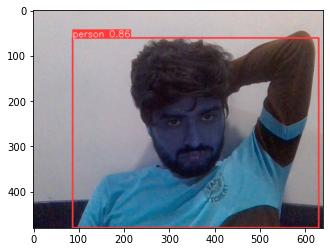

In [22]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'